3. Создание нейронной сети при помощи пакета torch. Dataset и Dataloader.

1. Автоматическое дифференцирование в torch
1.1 Воспользовавшись классами Neuron и MSELoss из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


torch.manual_seed(63)

In [2]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
X[:5], X.shape

(tensor([[-1.7495,  0.4857,  0.2629, -0.6336],
         [-0.1401,  1.0447,  0.6152, -1.4582],
         [-1.0061, -0.1046,  0.7982, -0.4125],
         [ 0.3922, -0.6040, -2.1592, -1.5028],
         [-0.4890,  0.6624, -0.8513, -0.9782]]),
 torch.Size([100, 4]))

In [4]:
y[:5], y.shape

(tensor([-209.3895, -131.3461, -106.6752, -166.4959, -159.2718]),
 torch.Size([100]))

In [5]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, dvalue):
        self.dweights = dvalue
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [6]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [7]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  18528.232421875
Loss:  11514.568359375
Loss:  7247.73046875
Loss:  4615.38232421875
Loss:  2970.0068359375
Loss:  1929.1064453125
Loss:  1263.4058837890625
Loss:  833.4960327148438
Loss:  553.4488525390625
Loss:  369.621337890625
Loss:  248.1328582763672
Loss:  167.3577117919922
Loss:  113.36164093017578
Loss:  77.09061431884766
Loss:  52.61784744262695
Loss:  36.03815841674805


/var/folders/ts/x51mbj490fld6jjg7k0l_slnb7mm6j/T/ipykernel_95841/1229769657.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2985.)
  return torch.matmul(inputs, self.weights.T) + self.bias


(tensor([88.3148, -1.4866, 26.3114, 89.9707], requires_grad=True),
 array([90.30576222,  0.49191295, 28.19599   , 93.98503743]))

1.2 Воспользовавшись классами Linear и MSELoss из задачи 2.1.4 и 2.3.1, ReLU из 2.2.1 и автоматическим дифференцированием,
которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск.
Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные
значения.

In [8]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    return torch.where(inputs>0, inputs, 0)

In [9]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [10]:
X[:5], X.shape

(tensor([[0.0000],
         [0.0101],
         [0.0202],
         [0.0303],
         [0.0404]]),
 torch.Size([100, 1]))

In [11]:
y[:5], y.shape

(tensor([[0.0558],
         [0.1185],
         [0.1298],
         [0.2740],
         [0.2868]]),
 torch.Size([100, 1]))

In [12]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

lr = 0.001
epochs = 1000

optimizer = torch.optim.SGD((*layer_1.parameters(), *layer_2.parameters()), lr=lr)

In [13]:
losses = torch.empty(epochs)
for epoch in range(epochs):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

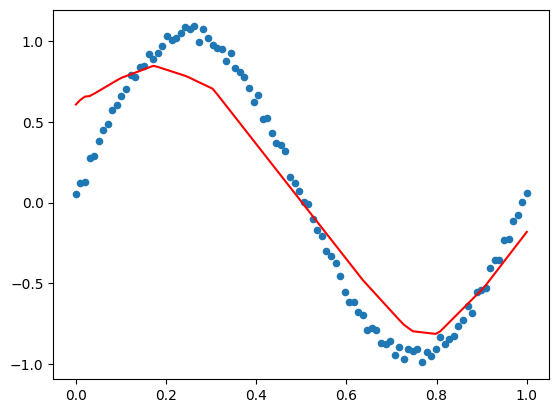

In [14]:
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
res = layer_2.forward(relu.forward(layer_1.forward(X)))
ax.plot(X, res.detach(), c='r')
plt.show()

2. Алгоритмы оптимизации в torch.optim

In [15]:
import torch.optim as optim

2.1 Решить задачу 1.1, воспользовавшись оптимизатором optim.SDG для применения стохастического градиентого спуска

In [16]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [17]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, dvalue):
        self.dweights = dvalue
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [18]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [19]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  9182.9091796875
Loss:  6452.43359375
Loss:  4545.32568359375
Loss:  3209.945556640625
Loss:  2272.533203125
Loss:  1612.8236083984375
Loss:  1147.3807373046875
Loss:  818.1796264648438
Loss:  584.7665405273438
Loss:  418.8695068359375
Loss:  300.6795349121094
Loss:  216.28289794921875
Loss:  155.8821258544922
Loss:  112.56083679199219
Loss:  81.42459869384766
Loss:  59.001136779785156


(tensor([44.0995, 43.9221, 23.1311, 74.0118], requires_grad=True),
 array([49.32164227, 44.99570618, 24.97143847, 79.1703351 ]))

2.2 Решить задачу 1.2, воспользовавшись оптимизатором optim.Adam для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [20]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    return torch.where(inputs>0, inputs, 0)

In [21]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [22]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

lr = 0.001
epochs = 1000

optimizer = torch.optim.Adam((*layer_1.parameters(), *layer_2.parameters()), lr=lr)

In [23]:
losses = torch.empty(epochs)
for epoch in range(epochs):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

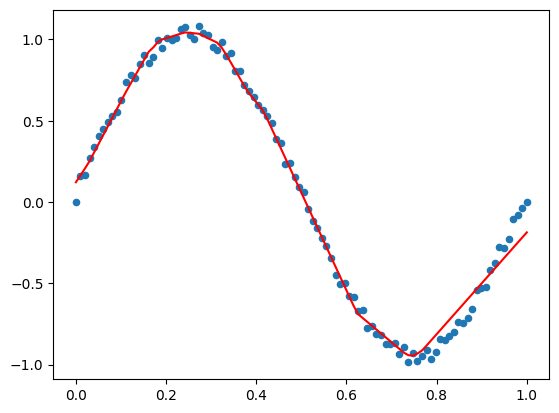

In [24]:
predicts = layer_2.forward(relu.forward(layer_1.forward(X)))
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
ax.plot(X, predicts.detach(), c='r')
plt.show()

3. Построение сетей при помощи torch.nn

In [25]:
import torch.nn as nn

3.1 Решить задачу регрессии, соблюдая следующие условия:

1) Оформить нейронную сеть в виде класса - наследника nn.Module
2) При создании сети использовать готовые блоки из torch.nn: слои, функции активации, функции потерь и т.д.
3) Для оптимизации использовать любой алгоритм оптимизации из torch.optim

In [26]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [56]:
class Net(nn.Module):
    def __init__(self, neurons):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = Net(15)
optimizer = optim.Adam(neuron.parameters(), lr=0.001)
loss = torch.nn.MSELoss()

Epoch 0 loss: 0.557288408279419
Epoch 1000 loss: 0.2012828290462494
Epoch 2000 loss: 0.19978685677051544
Epoch 3000 loss: 0.1958547830581665
Epoch 4000 loss: 0.1785338968038559
Epoch 5000 loss: 0.10593291372060776
Epoch 6000 loss: 0.022386791184544563
Epoch 7000 loss: 0.0017338052857667208
Epoch 8000 loss: 0.001087631331756711


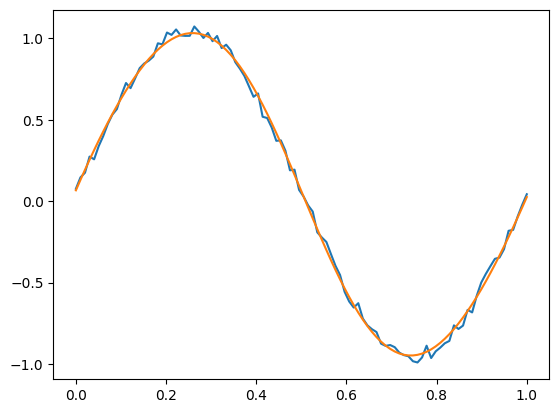

In [57]:
for epoch in range(9000):
    optimizer.zero_grad()
    y_pred = neuron.forward(X)
    loss_val = loss.forward(y_pred, y)
    loss_val.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} loss: {loss_val}")


with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X).detach().numpy())

In [58]:
y

tensor([[ 0.0766],
        [ 0.1464],
        [ 0.1754],
        [ 0.2746],
        [ 0.2576],
        [ 0.3382],
        [ 0.4002],
        [ 0.4743],
        [ 0.5317],
        [ 0.5663],
        [ 0.6535],
        [ 0.7265],
        [ 0.6949],
        [ 0.7546],
        [ 0.8177],
        [ 0.8466],
        [ 0.8637],
        [ 0.8890],
        [ 0.9704],
        [ 0.9641],
        [ 1.0366],
        [ 1.0222],
        [ 1.0556],
        [ 1.0185],
        [ 1.0161],
        [ 1.0165],
        [ 1.0738],
        [ 1.0416],
        [ 1.0031],
        [ 1.0343],
        [ 0.9835],
        [ 1.0155],
        [ 0.9412],
        [ 0.9618],
        [ 0.9274],
        [ 0.8544],
        [ 0.8148],
        [ 0.7696],
        [ 0.7062],
        [ 0.6416],
        [ 0.6622],
        [ 0.5191],
        [ 0.5115],
        [ 0.4524],
        [ 0.3713],
        [ 0.3740],
        [ 0.3108],
        [ 0.1902],
        [ 0.1940],
        [ 0.0698],
        [ 0.0286],
        [-0.0258],
        [-0.

In [59]:
neuron.forward(X)

tensor([[ 0.0672],
        [ 0.1310],
        [ 0.1936],
        [ 0.2547],
        [ 0.3142],
        [ 0.3722],
        [ 0.4284],
        [ 0.4827],
        [ 0.5352],
        [ 0.5857],
        [ 0.6340],
        [ 0.6801],
        [ 0.7238],
        [ 0.7651],
        [ 0.8039],
        [ 0.8400],
        [ 0.8734],
        [ 0.9039],
        [ 0.9314],
        [ 0.9559],
        [ 0.9771],
        [ 0.9951],
        [ 1.0098],
        [ 1.0210],
        [ 1.0286],
        [ 1.0327],
        [ 1.0330],
        [ 1.0296],
        [ 1.0225],
        [ 1.0116],
        [ 0.9968],
        [ 0.9782],
        [ 0.9557],
        [ 0.9295],
        [ 0.8996],
        [ 0.8659],
        [ 0.8287],
        [ 0.7880],
        [ 0.7440],
        [ 0.6967],
        [ 0.6464],
        [ 0.5933],
        [ 0.5375],
        [ 0.4794],
        [ 0.4191],
        [ 0.3569],
        [ 0.2932],
        [ 0.2281],
        [ 0.1621],
        [ 0.0954],
        [ 0.0284],
        [-0.0386],
        [-0.